# Main Simulation Loop Construction

Develop the main simulation loop for the formation model

01/05/2023

Andrew Weng

In [3]:
import os, sys

# Move the path up a level to be able to index into source files
if os.path.basename(os.getcwd()) == 'archives':
    os.chdir('../../')
    sys.path.insert(0, 'src/')

from src import cellsim as cellsim

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from src import plotter as plotter

%matplotlib widget
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload

Q0 = 2.35 # Ah
Ichg = Q0/10
Idch = -Q0/10
Icv = Q0/20

vmax = 4.2
vmin = 3.0

cell = cellsim.Cell()
cell.load_config('params/default.yaml')
sim = cellsim.Simulation(cell, 300*3600)

sim.run_rest(1, rest_time_hrs=2)
sim.run_chg_cccv(2, Q0, Icv, vmax)
sim.run_dch_cccv(2, Idch, Idch, vmin)
sim.run_chg_cccv(3, Ichg, Icv, vmax)
sim.run_dch_cccv(3, Idch, Idch, vmin)
sim.run_chg_cccv(4, Ichg, Icv, vmax)
sim.run_dch_cccv(4, Idch, Idch, vmin)
sim.run_chg_cccv(5, Ichg, Icv, vmax)
sim.run_rest(6, rest_time_hrs=200)


Running Cyc1: Rest for 2 hours...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...
Running Cyc4: Charge to 4.2V...
Running Cyc4: Discharge to 3.0V...
Running Cyc5: Charge to 4.2V...
Running Cyc6: Rest for 200 hours...


# Make the plot

/Users/aweng/code/formation-modeling/src/cellsim.py:1008: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'outputs/figures/{fig_name}.png',
/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


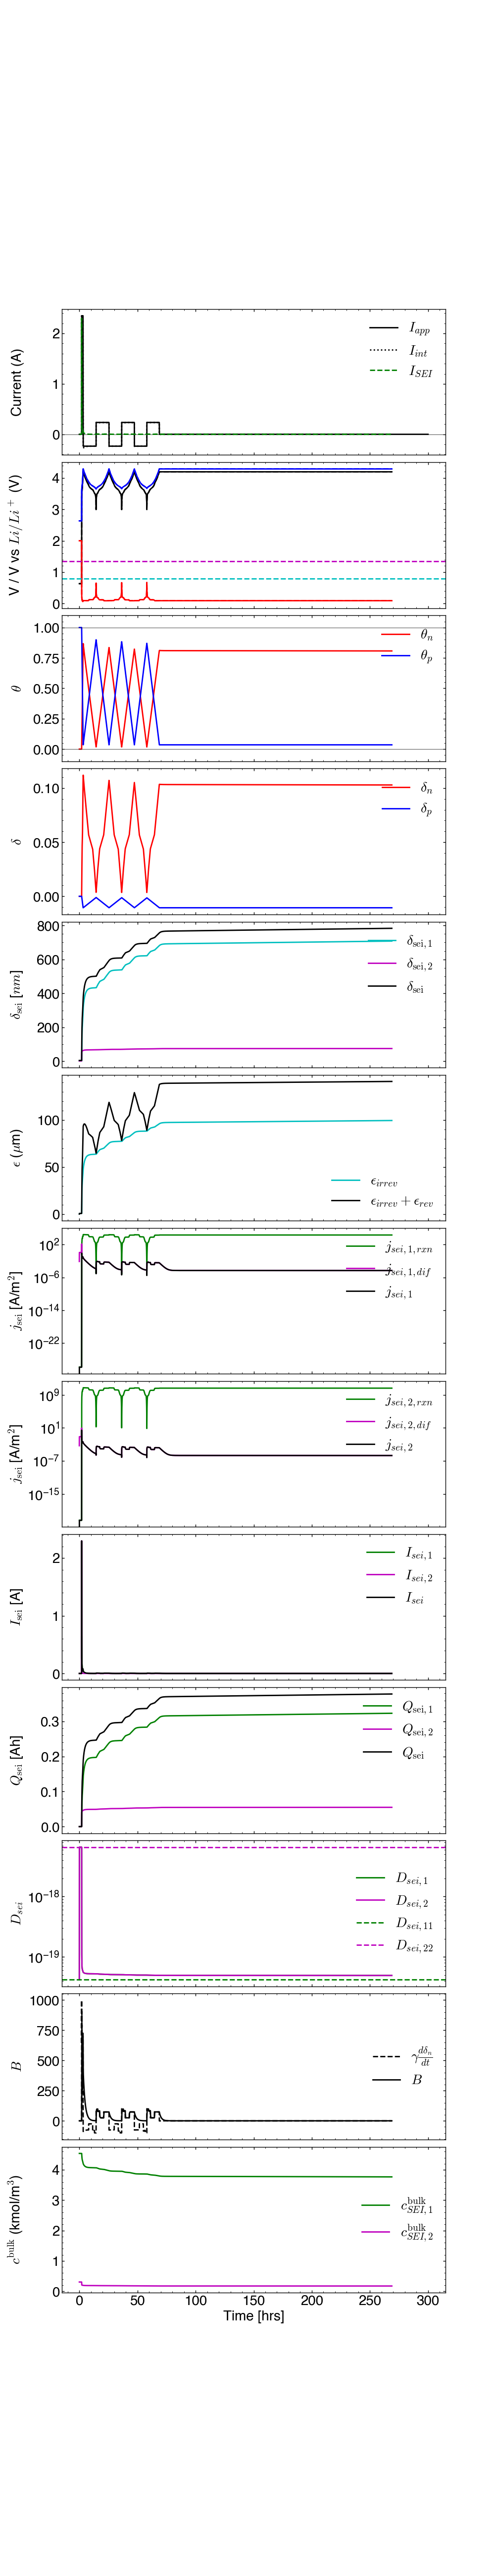

In [5]:
%autoreload
sim.plot()


In [6]:
df = pd.DataFrame(sim.__dict__)
df


,name,cell,dt,t,curr_k,i_app,cycle_number,step_number,theta_n,theta_p,...,eta_sei2,delta_sei,delta_sei1,delta_sei2,delta_n,delta_p,dndt,boost,expansion_rev,expansion_irrev
0,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,0.0,193556,0.0,1.0,4.0,0.000000e+00,1.0,...,0.00,5.000000e-09,2.500000e-09,2.500000e-09,0.000000e+00,-0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,5.0,193556,0.0,1.0,4.0,0.000000e+00,1.0,...,0.65,5.000000e-09,2.500000e-09,2.500000e-09,0.000000e+00,-0.0,0.000000e+00,0.0,0.000000e+00,6.350000e-07
2,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,10.0,193556,0.0,1.0,4.0,-1.532712e-25,1.0,...,0.65,5.000000e-09,2.500000e-09,2.500000e-09,-3.065423e-26,-0.0,-6.130847e-27,0.0,-1.379441e-29,6.350000e-07
3,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,15.0,193556,0.0,1.0,4.0,-3.065423e-25,1.0,...,0.65,5.000000e-09,2.500000e-09,2.500000e-09,-6.130847e-26,-0.0,-6.130847e-27,0.0,-2.758881e-29,6.350000e-07
4,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,20.0,193556,0.0,1.0,4.0,-4.598135e-25,1.0,...,0.65,5.000000e-09,2.500000e-09,2.500000e-09,-9.196270e-26,-0.0,-6.130847e-27,0.0,-4.138322e-29,6.350000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,1079975.0,193556,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215996,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,1079980.0,193556,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215997,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,1079985.0,193556,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215998,DefaultSim,<src.cellsim.Cell object at 0x1066fe340>,5.0,1079990.0,193556,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate cycle-by-cycle metrics

In [7]:
df = pd.DataFrame(sim.__dict__)
df['dq'] = np.abs(df['dt'] * df['i_app'] / 3600)
df_agg = df.groupby(['cycle_number', 'step_number'])['dq'].agg('sum')
df_agg


cycle_number  step_number
0.0           0.0            0.000000
1.0           4.0            0.000000
2.0           0.0            2.820000
              1.0            0.093063
              2.0            2.609479
3.0           0.0            2.605563
              1.0            0.004653
              2.0            2.561174
4.0           0.0            2.556604
              1.0            0.004657
              2.0            2.522007
5.0           0.0            2.517438
              1.0            0.004639
6.0           4.0            0.000000
Name: dq, dtype: float64

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.manager.handle_json(content)


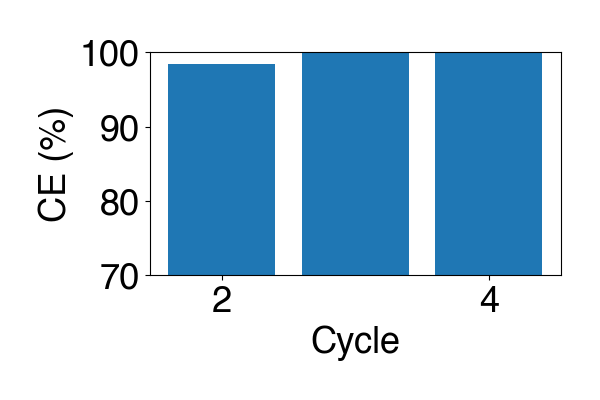

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.manager.handle_json(content)


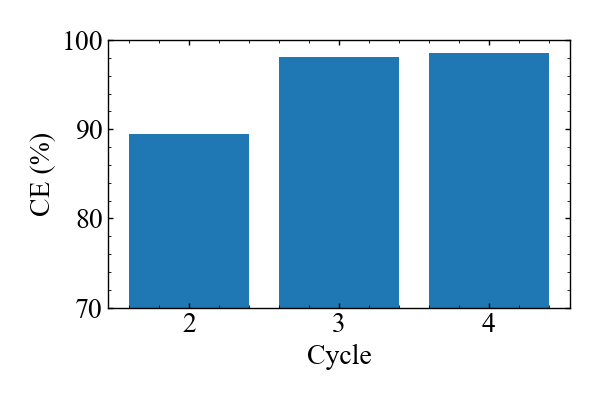

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.manager.handle_json(content)


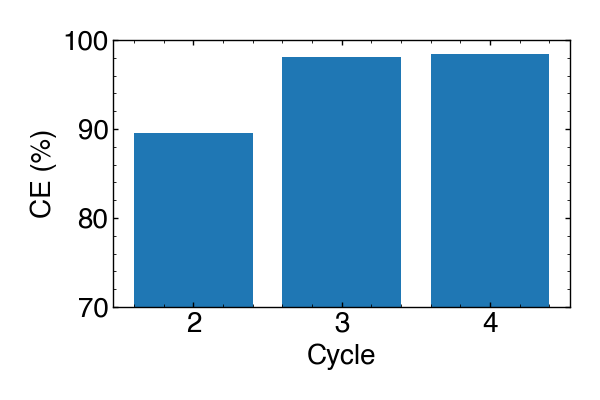

In [8]:
from matplotlib import pyplot as plt

ce = []
cycle_index = np.array([2, 3, 4])

for i in cycle_index:
    ce.append(df_agg[i][2] / (df_agg[i][0] + df_agg[i][1]))

ce = np.array(ce)

plt.figure(figsize=(6, 4))
plt.bar(cycle_index, ce*100)
plt.ylabel('CE (%)')
plt.grid(False)
plt.xlabel('Cycle')
plt.ylim([70, 100])
plt.show()


Text(0, 0.5, '$U_n$')

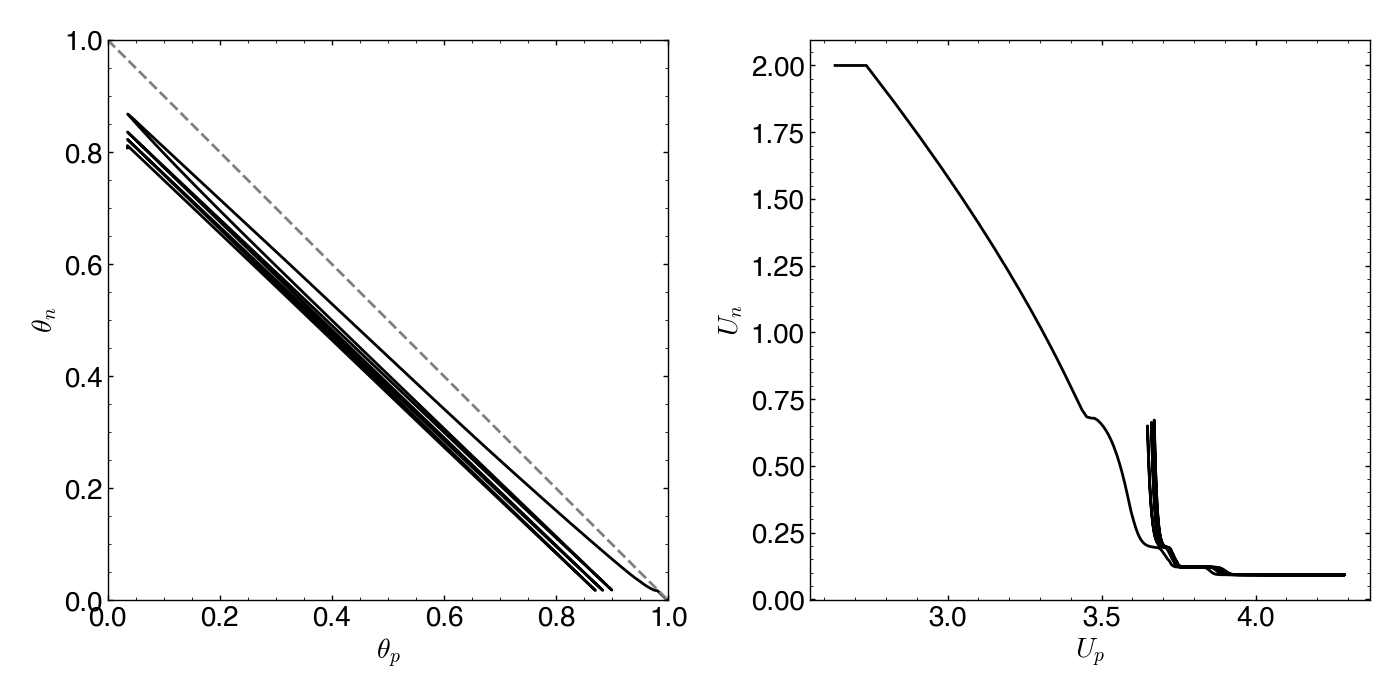

In [9]:
fh, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

xx = np.linspace(0, 1, 100)
ax0.plot(sim.theta_p, sim.theta_n, c='k')
ax0.plot(xx, 1-xx, c=(0.5,0.5,0.5), ls='--')
ax0.set_xlabel(r'$\theta_p$')
ax0.set_ylabel(r'$\theta_n$')
ax0.grid(False)
ax0.set_xlim((0,1))
ax0.set_ylim((0,1))

ax1.plot(sim.ocv_p, sim.ocv_n, c='k')
ax1.grid(False)
ax1.set_xlabel(r'$U_p$')
ax1.set_ylabel(r'$U_n$')
